In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end= '2019-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452592
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564353
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027313
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416672
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389565
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813286
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.337975


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452592
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564353
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [5]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


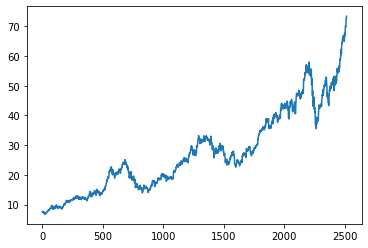

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

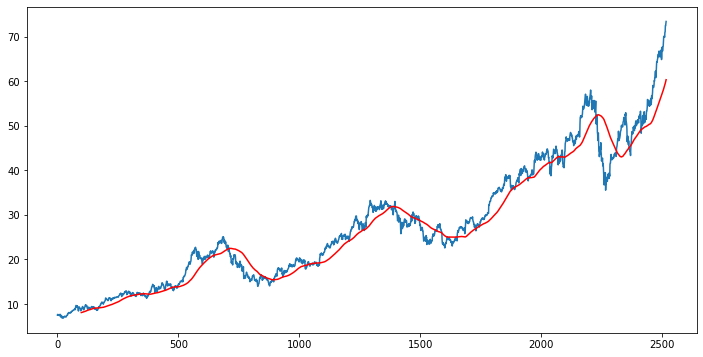

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

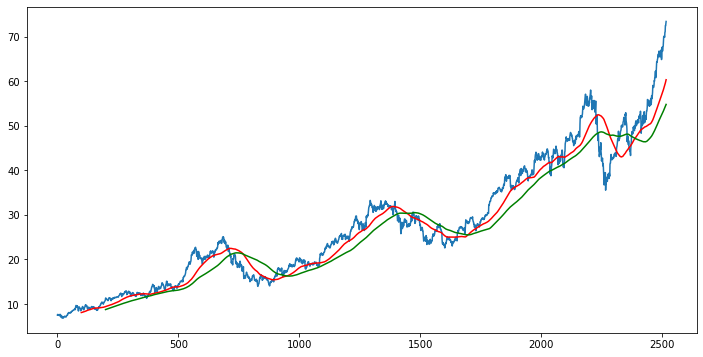

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2517, 5)

In [13]:
# Spliting data into Training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array =scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [18]:
data_training_array.shape

(1761, 1)

In [19]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train , y_train = np.array(x_train) , np.array(y_train)

In [20]:
x_train.shape

(1661, 100, 1)

In [21]:
#Ml Model

In [22]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' ,return_sequences = True , input_shape = (x_train.shape[1], 1)))

model.add(Dropout(0.2))



model.add(LSTM(units = 60 , activation = 'relu' ,return_sequences = True  ))

model.add(Dropout(0.3))



model.add(LSTM(units = 80 , activation = 'relu' ,return_sequences = True  ))

model.add(Dropout(0.4))



model.add(LSTM(units = 120 , activation = 'relu' ))

model.add(Dropout(0.5))



model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [25]:
model.compile(optimizer ='adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train , epochs = 50)

Epoch 1/50
52/52 [==============================] - 9s 132ms/step - loss: 0.0660
Epoch 2/50
52/52 [==============================] - 6s 114ms/step - loss: 0.0129
Epoch 3/50
52/52 [==============================] - 6s 116ms/step - loss: 0.0117
Epoch 4/50
52/52 [==============================] - 7s 143ms/step - loss: 0.0113
Epoch 5/50
52/52 [==============================] - 8s 150ms/step - loss: 0.0093
Epoch 6/50
52/52 [==============================] - 8s 147ms/step - loss: 0.0088
Epoch 7/50
52/52 [==============================] - 8s 146ms/step - loss: 0.0095
Epoch 8/50
52/52 [==============================] - 7s 143ms/step - loss: 0.0085
Epoch 9/50
52/52 [==============================] - 8s 145ms/step - loss: 0.0075
Epoch 10/50
52/52 [==============================] - 8s 151ms/step - loss: 0.0082
Epoch 11/50
52/52 [==============================] - 8s 147ms/step - loss: 0.0079
Epoch 12/50
52/52 [==============================] - 8s 145ms/step - loss: 0.0073
Epoch 13/50
52/52 [======

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [28]:
data_training.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df = past_100_days.append(data_testing , ignore_index = True)

In [31]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [32]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [33]:
input_data.shape

(856, 1)

In [34]:
x_test =[]
y_test =[]
 
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [35]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [36]:
# making predictions

y_predicted = model.predict(x_test)

In [37]:
y_predicted.shape

(756, 1)

In [38]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [39]:
y_predicted

array([[0.08593142],
       [0.08706003],
       [0.08802223],
       [0.08879623],
       [0.08937335],
       [0.08976483],
       [0.09001252],
       [0.090186  ],
       [0.09036097],
       [0.09060085],
       [0.09094092],
       [0.0913884 ],
       [0.09193838],
       [0.09257466],
       [0.09327111],
       [0.09399849],
       [0.0947288 ],
       [0.09543669],
       [0.09611577],
       [0.09676945],
       [0.09740335],
       [0.09801936],
       [0.09861368],
       [0.09925109],
       [0.10002479],
       [0.10104179],
       [0.10243109],
       [0.10429883],
       [0.10666957],
       [0.1095174 ],
       [0.11278006],
       [0.11638892],
       [0.12029366],
       [0.12445134],
       [0.1287994 ],
       [0.13328087],
       [0.13785559],
       [0.14247924],
       [0.1470651 ],
       [0.15152505],
       [0.15578413],
       [0.15978393],
       [0.16352503],
       [0.16701436],
       [0.1702727 ],
       [0.17331368],
       [0.17614603],
       [0.178

In [40]:
scaler.scale_

array([0.02099517])

In [41]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

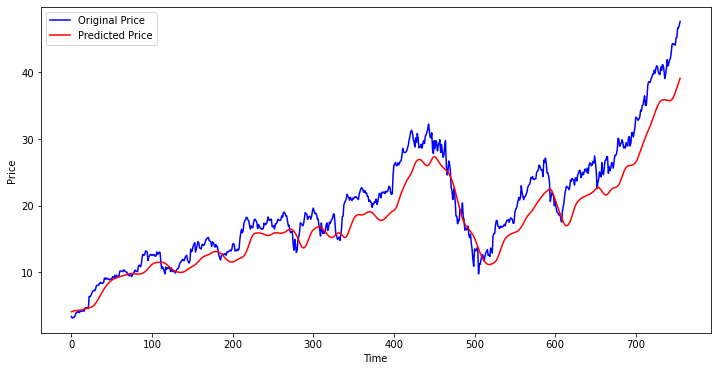

In [42]:
plt.figure(figsize= (12,6))
plt.plot(y_test , 'b', label ='Original Price' )
plt.plot(y_predicted, 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [48]:
import math
#Create a new dataframe with only the 'Close Column
data= df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset =data.values
#Get the numbr of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

2014

In [52]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01002413],
       [0.01178427],
       [0.01198282],
       ...,
       [0.98553794],
       [0.99199891],
       [1.        ]])

In [53]:
#Create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#splt the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([1.00241343e-02, 1.17842676e-02, 1.19828232e-02, 1.01529343e-02,
       9.94363872e-03, 1.06949161e-02, 9.69144086e-03, 8.40889292e-03,
       9.98120331e-03, 9.32652775e-03, 7.44834148e-03, 1.23369893e-02,
       1.05607712e-02, 8.59670868e-03, 3.05875169e-03, 5.91359568e-03,
       7.45370785e-03, 8.49476200e-03, 3.88515107e-03, 5.35920459e-06,
       1.43814399e-03, 2.04452939e-03, 3.85295285e-03, 0.00000000e+00,
       1.82987462e-03, 1.11080262e-03, 2.22161957e-03, 1.64742522e-03,
       3.55244334e-03, 4.47007816e-03, 6.09068587e-03, 5.63455881e-03,
       5.83846651e-03, 5.16231831e-03, 4.49153647e-03, 2.68847937e-03,
       4.62033650e-03, 5.33940849e-03, 6.74536143e-03, 9.09042183e-03,
       9.01529266e-03, 9.27285689e-03, 1.00134015e-02, 1.44351967e-02,
       1.45049595e-02, 1.66192588e-02, 1.75959094e-02, 1.79500754e-02,
       1.85403761e-02, 1.70592940e-02, 1.73866282e-02, 1.72095451e-02,
       1.74939555e-02, 1.62060556e-02, 1.75476192e-02, 1.94848284e-02,
     

In [54]:
#Convert the x_train and y_train to numpy arrays
x_train ,y_train=np.array(x_train), np.array(y_train)
    

In [55]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1954, 60, 1)

In [56]:
#build the lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))

In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [58]:
#Train the model
model.fit(x_train,y_train, batch_size=1,epochs=1)

1954/1954 [==============================] - 30s 14ms/step - loss: 3.6593e-04


In [74]:
model.save('keras_model1.h5')

In [59]:
#Create the testing daa set
#create a new array containig scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60:,:]
#create the data set x_test and y_test
x_test=[]
y_test= dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [60]:
x_test=np.array(x_test)

In [61]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [62]:
y_predicted = model.predict(x_test)
y_predicted = scaler.inverse_transform(y_predicted)

In [63]:
rmse = np.sqrt(np.mean( y_predicted - y_test)**2)
rmse

0.19250887193926286

<ipython-input-66-08f15feddb5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = y_predicted


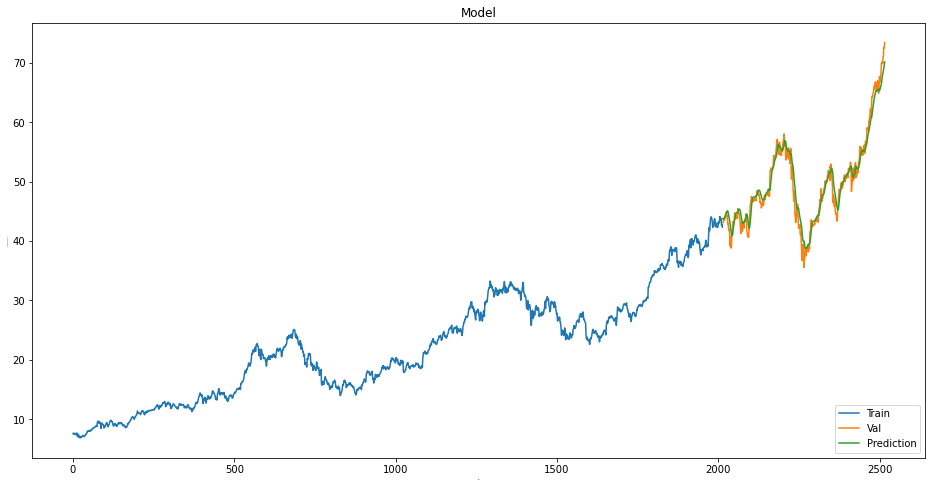

In [66]:
#plot the data
train =data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = y_predicted
#visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=1)
plt.ylabel('Close Price INR (Rs)',fontsize=1)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Prediction'],loc='lower right')
plt.show()

In [67]:
# Show the valid and predicted price
valid

,Close,Prediction
2014,43.064999,43.757664
2015,43.057499,43.683590
2016,43.257500,43.662197
2017,43.750000,43.694988
2018,43.587502,43.810818
...,...,...
2512,71.067497,68.661224
2513,72.477501,68.934357
2514,72.449997,69.345436
2515,72.879997,69.743958


In [73]:
import pandas_datareader as data
start = '2010-01-01'
end= '2019-12-31'

df = data.DataReader('AAPL','yahoo',start,end)

#Create a new dataframe
new_df = df.filter(['Close'])
#Get the last 60 days closing price values and convert the datframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to numpy
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scale
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print('Predicted Price = ',pred_price)

Predicted Price =  [[70.54504]]
